In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/train.csv', encoding='latin1', on_bad_lines='skip', engine='python')


In [ ]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
40360,20795,Rapper T.I.: Trump a âPoster Child For White...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
40361,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
40362,20797,Macyâs Is Said to Receive Takeover Approach ...,Michael J. de la Merced and Rachel Abrams,The Macyâs of today grew from the union of s...,0
40363,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
x=data.drop('label', axis=1)

In [ ]:
x.head(2)

,id,title,author,text
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [ ]:
y=data['label']

In [ ]:
y.head(2)

,label
0,1
1,0


In [ ]:
data.shape

(40365, 5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [ ]:
df=data.dropna()

In [ ]:
df.shape

(35298, 5)

In [ ]:
message=df.copy()

In [ ]:
message.reset_index(inplace=True)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
corpus=[]

import nltk
nltk.download('stopwords')

for i in range(0, len(message)):
  review=re.sub('[^a-zA-Z]', ' ', message['title'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000, ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()


In [ ]:
x.shape

(35298, 5000)

In [ ]:
y=message['label']

In [ ]:
y

,label
0,1
1,0
2,1
3,1
4,1
...,...
35293,0
35294,0
35295,0
35296,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names_out()[:20]


array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df=pd.DataFrame(x_train, columns=cv.get_feature_names_out())

In [ ]:
count_df.head(3)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
"""def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):



  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  thresh=cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')"""

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
## ALGO uSED Multinimial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.906
Confusion matrix, without normalization


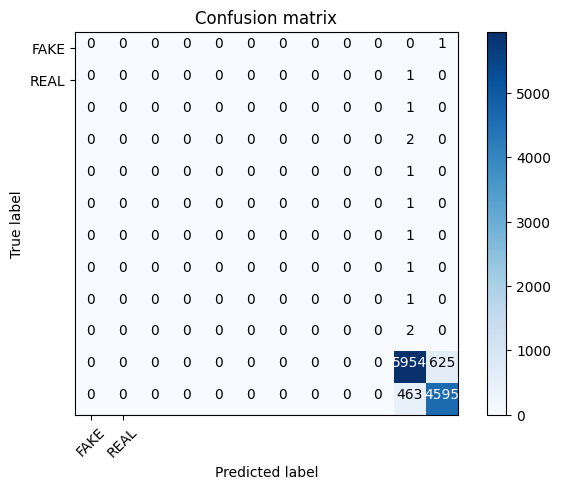

In [ ]:
classifier.fit(x_train, y_train)
pred=classifier.predict(x_test)
score=metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm=metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
##

# Passive Aggressive Classifer Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier(max_iter=50)

accuracy: 0.965
Confusion matrix, without normalization


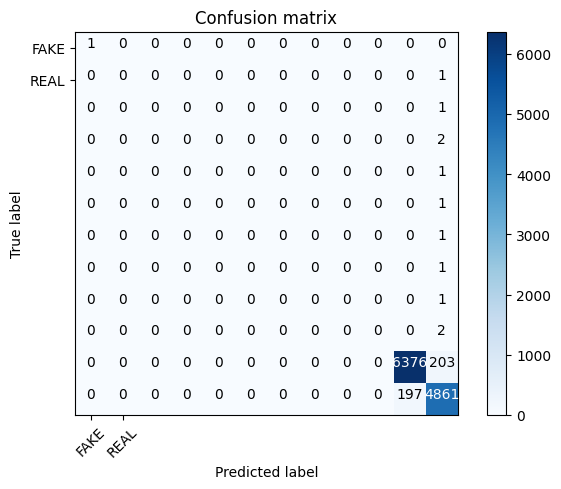

In [ ]:
linear_clf.fit(x_train, y_train)
pred=linear_clf.predict(x_test)
score=metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm=metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(x_train, y_train)
  y_pred=sub_classifier.predict(x_test)
  score=metrics.accuracy_score(y_test, y_pred)
  if score>previous_score:
    classifier=sub_classifier
  print("Alpha: {}, Score: {}".format(alpha, score))

/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: invalid value encountered in subtract
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score: 8.584427847883938e-05
Alpha: 0.1, Score: 0.9095201304833033
Alpha: 0.2, Score: 0.9088333762554726
Alpha: 0.30000000000000004, Score: 0.9082324663061206
Alpha: 0.4, Score: 0.9078890891922053
Alpha: 0.5, Score: 0.9069448021289381
Alpha: 0.6000000000000001, Score: 0.9063438921795862
Alpha: 0.7000000000000001, Score: 0.9061722036226285
Alpha: 0.8, Score: 0.9062580479011074
Alpha: 0.9, Score: 0.905914670787192


In [ ]:
# Assuming your model is fitted
classifier.feature_log_prob_[0]  # log probabilities for class 0


array([-8.51808169, -8.51808169, -8.51808169, ..., -8.51808169,
       -8.51808169, -8.51808169])

In [ ]:
#### Most real

sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()), reverse=True)[:20]

[(np.float64(-7.770867283647132), 'sinc'),
 (np.float64(-7.770867283647132), 'report'),
 (np.float64(-7.770867283647132), 'point'),
 (np.float64(-7.770867283647132), 'day'),
 (np.float64(-8.518081685477354), 'zuckerberg'),
 (np.float64(-8.518081685477354), 'zu'),
 (np.float64(-8.518081685477354), 'zone new york'),
 (np.float64(-8.518081685477354), 'zone new'),
 (np.float64(-8.518081685477354), 'zone'),
 (np.float64(-8.518081685477354), 'zionist'),
 (np.float64(-8.518081685477354), 'zika viru'),
 (np.float64(-8.518081685477354), 'zika'),
 (np.float64(-8.518081685477354), 'zero'),
 (np.float64(-8.518081685477354), 'zealand'),
 (np.float64(-8.518081685477354), 'youtub'),
 (np.float64(-8.518081685477354), 'youth'),
 (np.float64(-8.518081685477354), 'young'),
 (np.float64(-8.518081685477354), 'yorker'),
 (np.float64(-8.518081685477354), 'york time'),
 (np.float64(-8.518081685477354), 'york state')]

In [ ]:
### Most Fake
sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()))[:20]

[(np.float64(-8.518081685477354), 'abandon'),
 (np.float64(-8.518081685477354), 'abc'),
 (np.float64(-8.518081685477354), 'abc news'),
 (np.float64(-8.518081685477354), 'abduct'),
 (np.float64(-8.518081685477354), 'abe'),
 (np.float64(-8.518081685477354), 'abedin'),
 (np.float64(-8.518081685477354), 'abl'),
 (np.float64(-8.518081685477354), 'abort'),
 (np.float64(-8.518081685477354), 'abroad'),
 (np.float64(-8.518081685477354), 'absolut'),
 (np.float64(-8.518081685477354), 'abstain'),
 (np.float64(-8.518081685477354), 'absurd'),
 (np.float64(-8.518081685477354), 'abus'),
 (np.float64(-8.518081685477354), 'abus new'),
 (np.float64(-8.518081685477354), 'abus new york'),
 (np.float64(-8.518081685477354), 'academi'),
 (np.float64(-8.518081685477354), 'accept'),
 (np.float64(-8.518081685477354), 'access'),
 (np.float64(-8.518081685477354), 'access pipelin'),
 (np.float64(-8.518081685477354), 'access pipelin protest')]